In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:

from scipy.optimize import minimize




# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = 0.019970229166978992
omega_0_v = 37.75096360523608


K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    

n_grid = 20
range_min = 3
range_max = 3.5
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]
# print(dt)
print(t_data)
# del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
# omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:3], params[3:]
    theta = theta_flat.reshape(theta_shape)


    u = np.zeros(n_grid + 2)
    u[0] = f(theta,w, range_min - dt)
    u[1] = del_0_v
    for i in range(1, n_grid):
        u[i + 1] = f(theta,w, t_data[i])
    u[n_grid + 1]=f(theta,w, range_max + dt)
  
    u_prime = (u[2:] - u[:-2])/(2*dt)
    omega_0 = u_prime[0]+ws
    u_double_prime = (u_prime[2:] - u_prime[:-2])/(2*dt)
    loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    
    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b = 0
    loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss



[3.         3.02631579 3.05263158 3.07894737 3.10526316 3.13157895
 3.15789474 3.18421053 3.21052632 3.23684211 3.26315789 3.28947368
 3.31578947 3.34210526 3.36842105 3.39473684 3.42105263 3.44736842
 3.47368421 3.5       ]


In [7]:
# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.zeros(3)
theta = np.random.uniform(0, 2 * np.pi, size=(3,1))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


Current loss: 1.1165410322236915
Current loss: 0.13716113582899142
Current loss: 0.13689054625706976
Current loss: 0.1347592759180324
Current loss: 0.13374075338066696
Current loss: 0.13373929006998544
Current loss: 0.1337367905921653
Current loss: 0.13371577175202615
Current loss: 0.1337122331775101
Current loss: 0.13370703577584817
Current loss: 0.13369940574212927
Current loss: 0.13368970769546928
Current loss: 0.13368003249371518
Current loss: 0.13367026859398384
Current loss: 0.13365920406382392
Current loss: 0.13364470785937846
Current loss: 0.133623888277843
Current loss: 0.13359179348870867
Current loss: 0.13354666518427122
Current loss: 0.13353407043155097
Current loss: 0.13351617652755737
Current loss: 0.13350968641999886
Current loss: 0.1334997687677555
Current loss: 0.13349444928945065
Current loss: 0.13348855833197518
Current loss: 0.1334860008572583
Current loss: 0.13348483543036666
Current loss: 0.13348324270478168
Current loss: 0.13348089705338181
Current loss: 0.133480

In [8]:
print(w)
print(theta)

[ 0.02627344 -0.00324318  0.        ]
[[ 1.42114903]
 [10.22376299]
 [ 5.2132685 ]]


In [9]:
# num_layers=4
# # theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits),requires_grad=True)
# theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits))
# # w=np.zeros(3,requires_grad=True)
# w=np.zeros(3)


# initial_params = [w,theta]
# # initial_params = [4, 4, 4,4]
# # initial_params = [10, 20, 8,70]
# # initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# # initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# # result = minimize(loss, initial_params, method='Nelder-Mead')
# result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

# theta,w = result.x

In [10]:
del_target_values =[0.0134410129532394, 0.013388631673126634, 0.01358607646551478, 0.014021601755703479, 0.014682502623948568, 0.015555114805462037, 0.016624814690412007, 0.01787601932392282, 0.01929218640607497, 0.020855814291905132, 0.022548441991406102, 0.024350993051797675, 0.026249690446803333, 0.02822863423421034, 0.03027075158556646, 0.03235971101008407, 0.03447992235464011, 0.036616536803776245, 0.038755446879698736, 0.040883286442278496]
omega_target_values = [37.692309769349905, 37.70205776497783, 37.71135856689316, 37.72016644638594, 37.728442028555335, 37.73615229230969, 37.74327057036645, 37.74977654925223, 37.755656269302776, 37.76090212466296, 37.76551286328683, 37.7694929344868, 37.77284066206141, 37.775561576763735, 37.777667872591294, 37.77917496278387, 37.78010147982352, 37.78046927543459, 37.78030342058369, 37.779632205479714]


20
20
[0.01962612 0.02106559 0.02252448 0.02400277 0.02550047 0.02701758
 0.02855409 0.03011002 0.03168535 0.03328009 0.03489424 0.03652779
 0.03818075 0.03985313 0.0415449  0.04325609 0.04498669 0.04673669
 0.0485061  0.05029492]


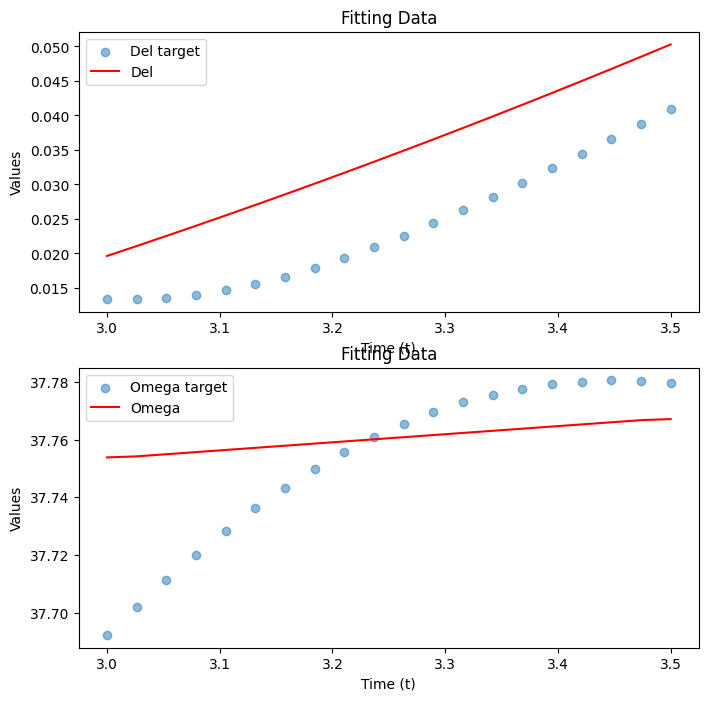

20
20
0.0502949173315539
37.76708509366104
[0.01962612 0.02106559 0.02252448 0.02400277 0.02550047 0.02701758
 0.02855409 0.03011002 0.03168535 0.03328009 0.03489424 0.03652779
 0.03818075 0.03985313 0.0415449  0.04325609 0.04498669 0.04673669
 0.0485061  0.05029492]
[37.75381011 37.75417886 37.75491636 37.75565386 37.75639136 37.75712886
 37.75786636 37.75860386 37.75934136 37.76007885 37.76081635 37.76155385
 37.76229135 37.76302885 37.76376635 37.76450385 37.76524135 37.76597885
 37.76671634 37.76708509]


In [11]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
print('===================')
delta_pred = np.array([f(theta,w,t_i)[0] for t_i in t_data])
print(len(delta_pred))
print(len(t_data))
plt.plot(t_data, delta_pred, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(delta_pred)
# Plot the target values and the fitted curve
# plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)

del_prime = np.gradient(delta_pred, t_data)
omega_pred = del_prime+ws

plt.plot(t_data, omega_pred, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

# plt.show()
print(len(delta_pred))
print(len(omega_pred))
print(delta_pred[-1])
print(omega_pred[-1])

print(delta_pred)
print(omega_pred)


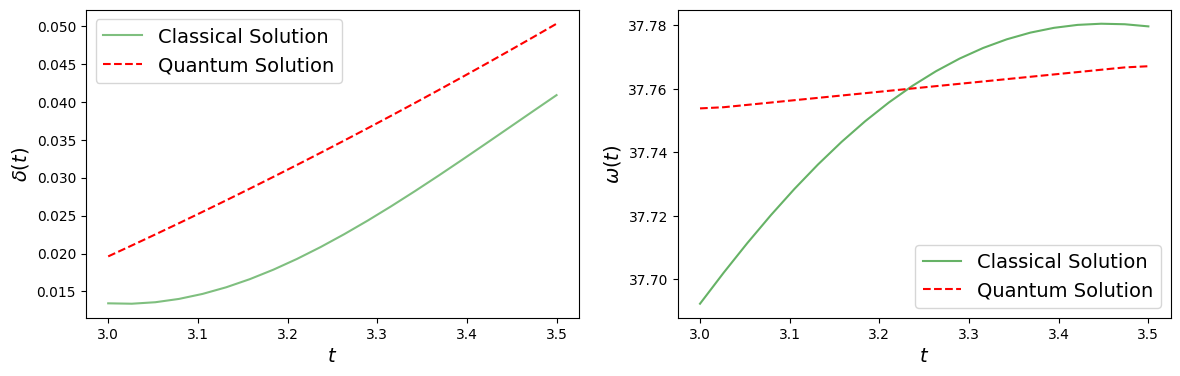

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Set a larger font size
font_size = 14

# Plot the delta and omega values side by side with padding
fig, axs = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# Plotting Precise and Quantum Solution for delta(t)
axs[0].plot(t_data, del_target_values,color='green', label='Classical Solution', alpha=0.5)
delta_pred = np.array([f(theta,w,t_i)[0] for t_i in t_data])
axs[0].plot(t_data, delta_pred, 'r--', label='Quantum Solution')

axs[0].set_xlabel('$t$', fontsize=font_size)  # Set font size for x-axis label
axs[0].set_ylabel('$\delta(t)$', fontsize=font_size)  # Set font size for y-axis label
axs[0].legend(fontsize=font_size)  # Set font size for legend
# axs[0].set_title('Comparison of Precise and Quantum Solution for $\\delta(t)$', fontsize=font_size)  # Set font size for title

# Plotting Precise and Quantum Solution for omega(t)
axs[1].plot(t_data, omega_target_values,color='green', label='Classical Solution', alpha=0.6)

# Calculating omega_pred using the gradient of delta_pred and ws
del_prime = np.gradient(delta_pred, t_data)
omega_pred = del_prime + ws

axs[1].plot(t_data, omega_pred, 'r--', label='Quantum Solution')

axs[1].set_xlabel('$t$', fontsize=font_size)  # Set font size for x-axis label
axs[1].set_ylabel('$\omega(t)$', fontsize=font_size)  # Set font size for y-axis label
axs[1].legend(fontsize=font_size)  # Set font size for legend
# axs[1].set_title('Comparison of Precise and Quantum Solution for $\\omega(t)$', fontsize=font_size)  # Set font size for title

# Adjust layout for better spacing with added padding
plt.subplots_adjust(wspace=0.2)  # Set the desired width space between subplots

plt.show()
